### Chargement des librarires nécessaires à l'exploitation des données :

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np

### Chargement des bases de données au format "csv" avec la méthode "read_csv" de pandas pour l'année 2021 :

In [9]:
df_user_2021 = pd.read_csv("data/usagers-2021.csv", sep=';')

In [10]:
df_user_2021.head()

,Num_Acc,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,202100000001,201 764,B01,1,1,3,1,2000.0,1,0,9,-1,0,0,-1
1,202100000001,201 765,A01,1,1,1,1,1978.0,1,1,-1,-1,0,0,-1
2,202100000002,201 762,A01,1,1,4,1,1983.0,0,1,-1,-1,0,0,-1
3,202100000002,201 763,B01,1,1,3,1,1993.0,0,1,-1,-1,0,0,-1
4,202100000003,201 761,A01,1,1,1,1,1995.0,1,1,0,-1,0,0,-1


In [11]:
df_user_2021.shape

(129153, 15)

In [24]:
#Recodage des valeurs -1 et 0 ('non renseigné') par des NaN
df_user_2021 = df_user_2021.replace(-1, np.nan)
df_user_2021 = df_user_2021.replace(0, np.nan)

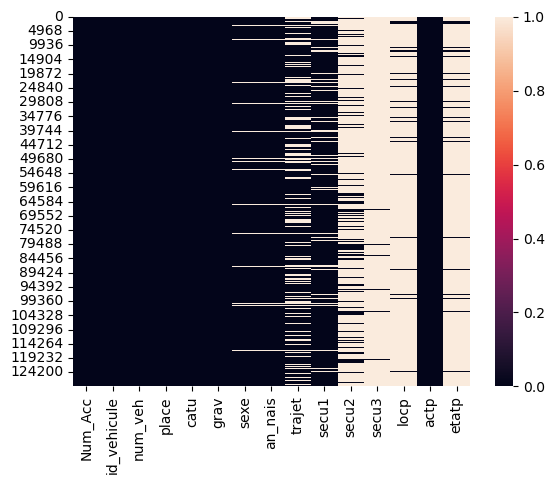

In [27]:
#Carte thermique pour visualiser les valeurs manquantes par variable
sns.heatmap(df_user_2021.isna());

In [26]:
#pourcentage de valeurs manquantes
df_user_2021.isna().sum()/df_user_2021.shape[0]*100

Num_Acc         0.000000
id_vehicule     0.000000
num_veh         0.000000
place           0.013163
catu            0.000000
grav            0.046457
sexe            2.370831
an_nais         2.374703
trajet         27.733773
secu1          11.321456
secu2          79.050429
secu3          99.161460
locp           92.810078
actp            0.000000
etatp          92.796141
dtype: float64

Les variables secu2, secu 3, locp et etatp contiennent respectivement 79,1 %, 99,2 %, 92,9 % et 92,8 % de valeurs manquantes/non renseignées (NaN) 
**-->** variables non pertinentes pour une analyse

In [18]:
df_user_2021['grav'].isna().sum()

60

### Répartition de la variable catégorielle "grav" où :
**1** - Indemne \
**2** - Tué \
**3** - Blesssé hospitalisé \
**4** - Blessé léger 

In [19]:
df_count_grav = df_user_2021['grav'].value_counts()

In [20]:
df_count_grav

1.0    55108
4.0    51681
3.0    19085
2.0     3219
Name: grav, dtype: int64

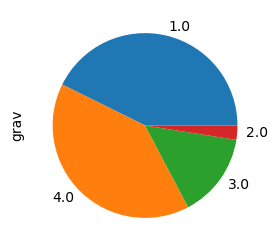

In [21]:
df_count_grav.plot.pie(subplots=True, figsize = (3, 3));

In [39]:
df_user_2021['catu'].value_counts()

1    97276
2    22403
3     9474
Name: catu, dtype: int64

In [41]:
df_user_2021['secu1'].value_counts()

1.0    75685
2.0    23945
8.0    13755
3.0      821
6.0      114
9.0      109
4.0       75
5.0       24
7.0        3
Name: secu1, dtype: int64

In [45]:
#groupons les données du dataframe en fonction de la gravité 
grouped_grav = df_user_2021.groupby("grav")

#accedons à cette nouvelle variable en comptant le nombre d'occurences pour chaque modalité de la variable sexe
print(grouped_grav['sexe'].value_counts())

grav  sexe
1.0   1.0     37163
      2.0     14943
2.0   1.0      2520
      2.0       699
3.0   1.0     13640
      2.0      5445
4.0   1.0     32873
      2.0     18808
Name: sexe, dtype: int64


In [46]:
#groupons les données du dataframe en fonction de la gravité 
grouped_grav = df_user_2021.groupby("grav")

#accedons à cette nouvelle variable en comptant le nombre d'occurences pour chaque modalité de la variable sexe
print(grouped_grav['trajet'].value_counts())

grav  trajet
1.0   5.0       16647
      4.0        7732
      1.0        7201
      9.0        4416
      3.0        1974
      2.0         849
2.0   5.0        1658
      1.0         331
      9.0         242
      3.0         186
      4.0         148
      2.0          23
3.0   5.0        9257
      1.0        2318
      9.0        1316
      3.0         868
      4.0         699
      2.0         437
4.0   5.0       17861
      1.0        7487
      9.0        5057
      4.0        3602
      2.0        1522
      3.0        1503
Name: trajet, dtype: int64


#### On retrouve davantage d'usagers tués, blessés ou indemnes lors d'accidents survenant sur un trajet "promenade-loisirs" : 

In [22]:
grav_type_trajet = pd.crosstab(df_user_2021["grav"], df_user_2021["trajet"])

In [23]:
grav_type_trajet

trajet,0.0,1.0,2.0,3.0,4.0,5.0,9.0
grav,,,,,,,
1.0,13180,7201,849,1974,7732,16647,4416
2.0,620,331,23,186,148,1658,242
3.0,4171,2318,437,868,699,9257,1316
4.0,14578,7487,1522,1503,3602,17861,5057


### Quelle est la proportion d'accidents en fonction du type de trajet ?

### Suppression des colonnes non nécessaires à l'aide de la méthode "drop" :

In [5]:
new_user_2021 = df_user_2021.drop(columns=["id_vehicule","num_veh","place","catu","trajet","secu1","secu2","secu3","locp","actp","etatp"], axis=1)
new_user_2021

,Num_Acc,grav,sexe,an_nais
0,202100000001,3,1,2000.0
1,202100000001,1,1,1978.0
2,202100000002,4,1,1983.0
3,202100000002,3,1,1993.0
4,202100000003,1,1,1995.0
...,...,...,...,...
129148,202100056516,4,1,1975.0
129149,202100056516,4,1,2002.0
129150,202100056517,3,1,1999.0
129151,202100056518,3,1,1968.0


<h3>Statistiques descriptives sur la table "utilisateurs-2021.csv"</h3>

D'après le graphique ci-dessous et pour l'année 2021 :

- 21,7 % des usagers accidentés et décédés sont des femmes 
- 28,7 % des usagers accidentés et indemnes sont des femmes
- 28,5 % des usages accidentés ayant été blessé et hospitalisé sont des femmes
- 36,4 % des usagers accidentés ayant été blessé léger sans hospitalisation sont des femmes

-----------------------------------------------------------------------
<i>grav = gravité de blessure de l'usager, les usagers accidentés sont classés en trois catégories de victimes plus les indemnes :
1 – Indemne
2 – Tué
3 – Blessé hospitalisé
4 – Blessé léger</i>

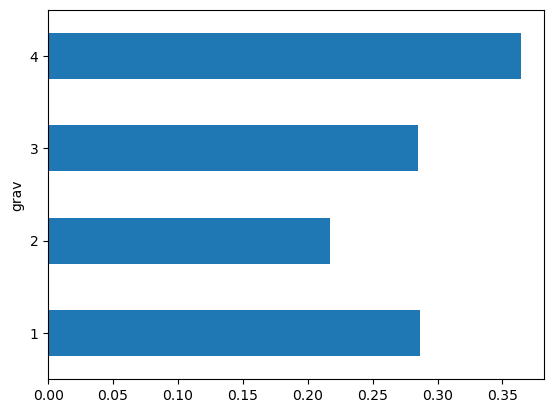

In [7]:
(
new_user_2021
    .query("grav!=-1")
    .query("sexe!=-1")
    .assign(sexe= lambda x: x.sexe -1)
    .groupby("grav")
    .sexe.mean()
    .plot(kind="barh")
);